<a href="https://colab.research.google.com/github/subhashdixit/Linear_Regression/blob/main/Algerian_Forest_Dataset/Algerian_Forest_FIre_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression Model**
**Types:**
1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. Elastic-Net Regression

# **Problem Statement**
* To predict the temperature using Algerian forest fire dataset

**Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_columns', 500)

**Read data from github**

In [2]:
url = "https://raw.githubusercontent.com/subhashdixit/Linear_Regression/main/Algerian_Forest_Dataset/Algerian_forest_fires_dataset.csv"
df=pd.read_csv(url,header=1 )

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


# **Data Checks and cleaning**

**Checking Null Values**

In [4]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


**Drop rows which have null**

In [5]:
df.drop([122,123, 167],axis=0, inplace=True)
df = df.reset_index()
df.head()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


**Show all the columns**

In [6]:
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

**Column name having extra space**

In [7]:
[x for x in df.columns if ' ' in x]

[' RH', ' Ws', 'Rain ', 'Classes  ']

**Remove extra space in column names**

In [8]:
df.columns = df.columns.str.strip()
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

**Function to remove extra space in the data**

In [9]:
import re
def Remove_Extra_Space(x):
  return (re.sub(' +', ' ', x).strip())

**Remove extra space in the data**

In [10]:
df['Classes'] = df['Classes'].apply(Remove_Extra_Space)

**Drop extra index column, which was created for reset_index**

In [11]:
df.drop(['index'],axis=1, inplace=True)

**Create data feature with the help of day, month and year feature and converted to datetime**

In [12]:
df['date'] = pd.to_datetime(df[['day', 'month', 'year']])

**Drop day, month and year feature**

In [13]:
df.drop(['day', 'month', 'year'], axis = 1, inplace = True)

**Imputation of date based on temperature. Usually in summer temperature is more and in winter it is less. So, we have categorized it based on month**

In [14]:
def date_imputation(x):
  if (x >= pd.to_datetime('2012-07-01')) and (x <= pd.to_datetime('2012-09-01')):
    return 1
  else:
    return 0
df['date'] = df['date'].apply(date_imputation)

In [15]:
df['date'].value_counts()

1    125
0    118
Name: date, dtype: int64

**Create one region,just to identify the two region i.e.,Sidi-Bel Abbes Region and Bejaia Region**

In [16]:
df.loc[:122, 'Region'] = 0
df.loc[122:, 'Region'] = 1

**check null values in all the features**

In [17]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
date           0
Region         0
dtype: int64

**Map classes feature as 1 and 0 for fire and not fire respectively**

In [18]:
df['Classes'] = df['Classes'].map({'not fire' : 0, 'fire': 1})

**Check duplictes values in all the column**

In [19]:
df.duplicated().sum()

0

**Check data types of all the features**

In [20]:
df.dtypes

Temperature     object
RH              object
Ws              object
Rain            object
FFMC            object
DMC             object
DC              object
ISI             object
BUI             object
FWI             object
Classes          int64
date             int64
Region         float64
dtype: object

**Convert features to its logical datatypes**

In [21]:
convert_data = {'Temperature' : 'float64', 'RH': 'float64', 'Ws': 'float64',
 'DMC' : 'float64', 'DC' : 'float64', 'ISI': 'float64', 'BUI': 'float64', 'FWI' : 'float64', 
 'Region' : 'object', 'Rain' : 'float64', 'FFMC' : 'float64' , 'Classes':'object','date':'object'}
df = df.astype(convert_data)

**Converted datatpyes**

In [22]:
df.dtypes

Temperature    float64
RH             float64
Ws             float64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
date            object
Region          object
dtype: object

**Check unique values in all the features**

In [23]:
df.nunique()

Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            165
DC             197
ISI            106
BUI            173
FWI            125
Classes          2
date             2
Region           2
dtype: int64

**Check statistics of dataset**

In [24]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391
std,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000
50%,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000
75%,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


**Segregate categorical feature from the dataset**

In [25]:
categorical_feature=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_feature

['Classes', 'date', 'Region']

In [26]:
for feature in categorical_feature:
 print(df.groupby(feature)[feature].value_counts())

Classes  Classes
0        0          106
1        1          137
Name: Classes, dtype: int64
date  date
0     0       118
1     1       125
Name: date, dtype: int64
Region  Region
0.0     0.0       122
1.0     1.0       121
Name: Region, dtype: int64


**Segregate numerical feature from the dataset**

In [27]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
print(numerical_features)

['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']


**Segregate discrete feature from the numerical feature**

In [28]:
#here the assumption to consider a feature discrete is that it should have less than 35 unique values otherwise it will be 
# considered continuous feature
discrete_features=[feature for feature in numerical_features if len(df[feature].unique())<18]
discrete_features

[]

**Segregate continuous feature from the numerical feature**

In [29]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_features]
print(continuous_features)

['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']


# **Graphical Analysis**

**Checking distribution of Continuous numerical features**

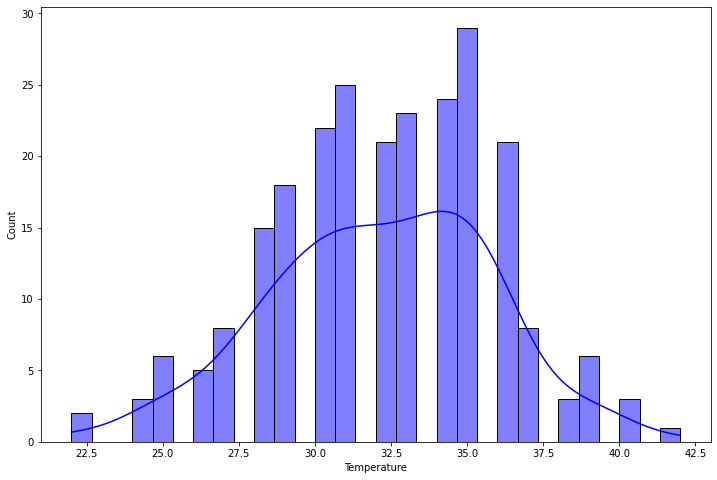

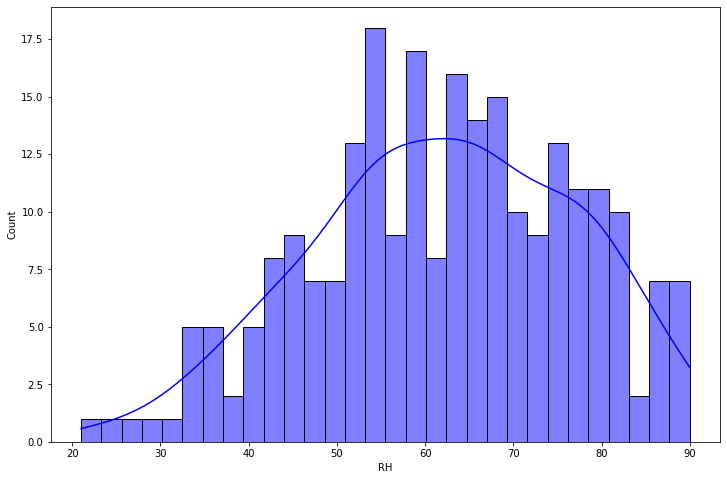

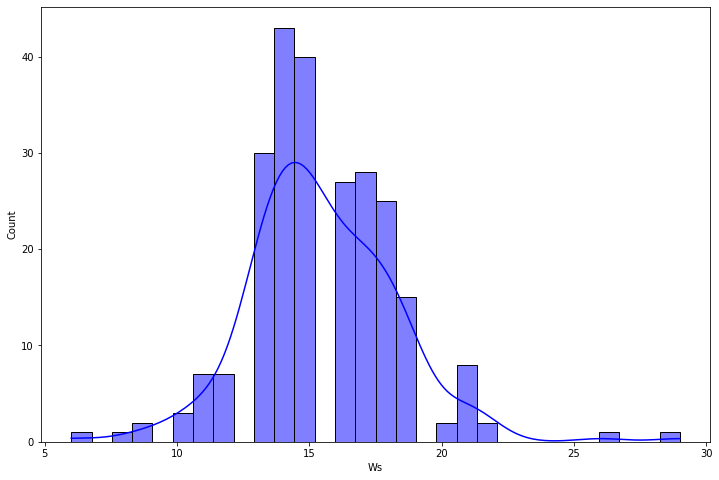

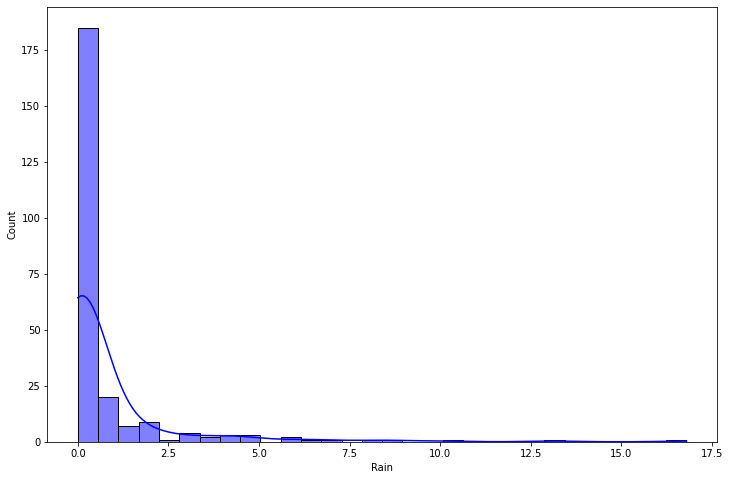

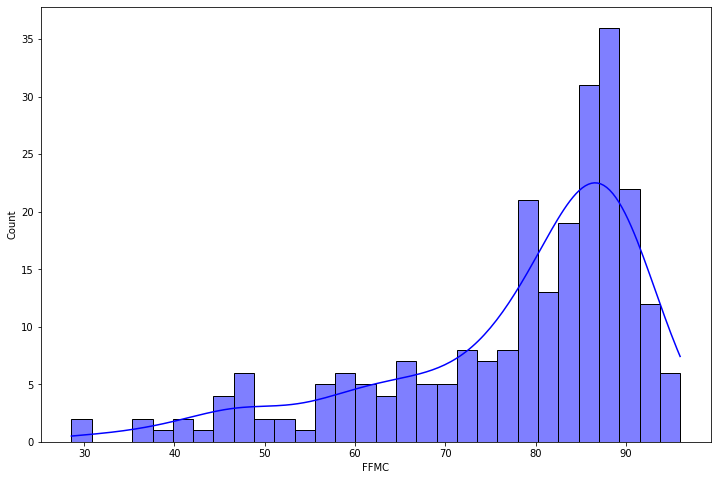

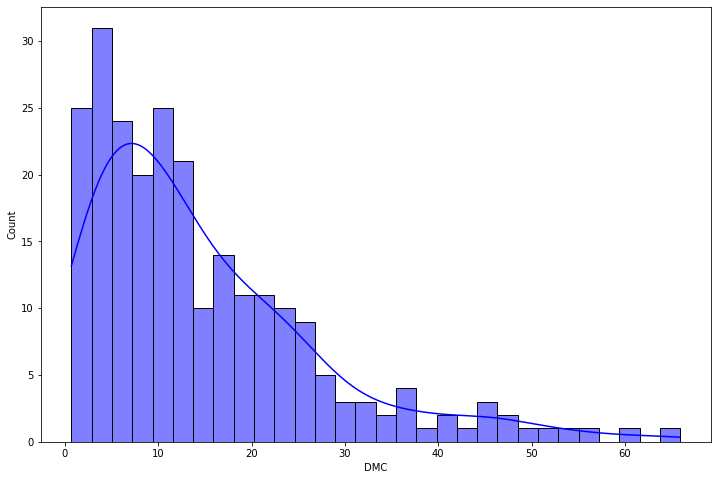

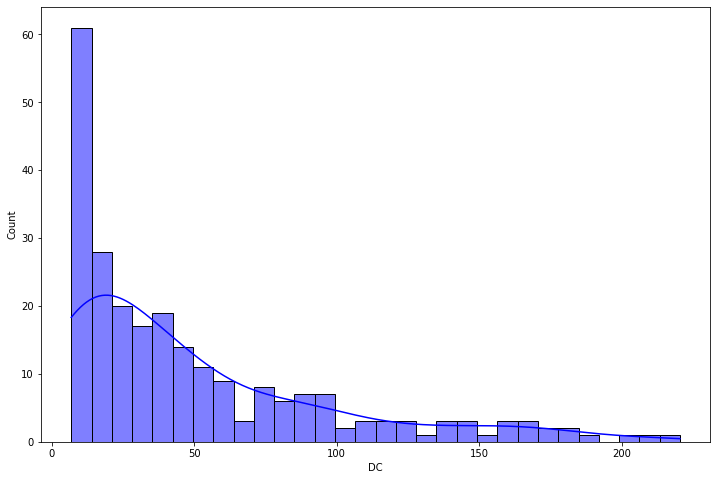

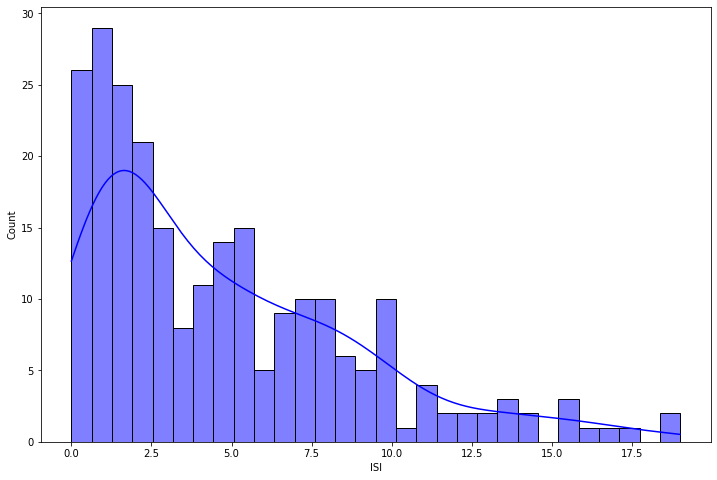

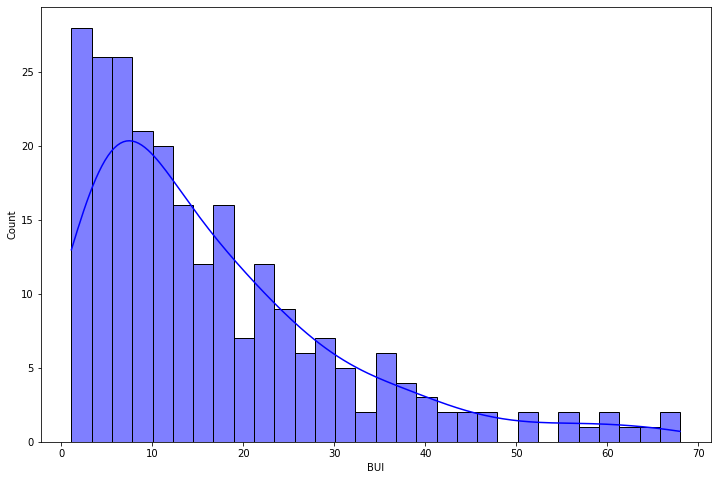

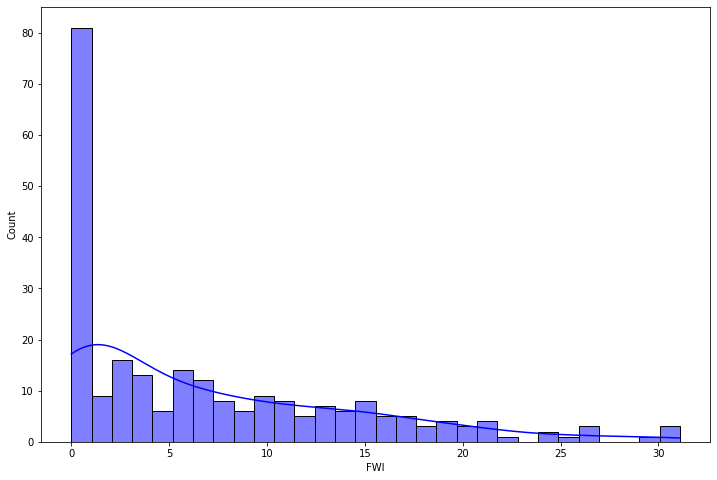

In [30]:
for feature in continuous_features:
    plt.figure(figsize=(12,8))
    sns.histplot(data=df, x=feature,kde=True, bins=30, color='blue')
    plt.show();

# **Outliers Handling**

**Before removing Outliers**

Text(0.5, 1.0, 'Before Removing Outliers')

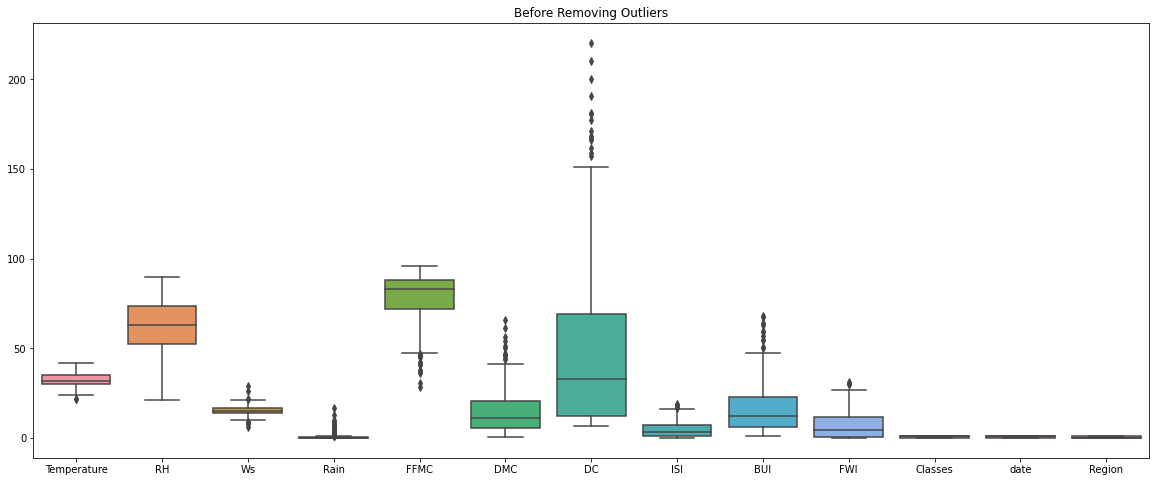

In [31]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=df)
plt.title("Before Removing Outliers")

**Function to find upper and lower boundaries**

In [32]:
def find_boundaries(df, variable, distance):
 IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
 lower_boundary = df[variable].quantile(0.25) - (IQR*distance)
 upper_boundary = df[variable].quantile(0.75) + (IQR*distance)
 return upper_boundary, lower_boundary

**Deletion of outliers**

In [33]:
outliers_columns = ['Temperature', 'Ws','Rain','FFMC','DMC','ISI','BUI', 'FWI']
for i in outliers_columns:
  upper_boundary, lower_boundary = find_boundaries(df,i, 1.5)
  outliers = np.where(df[i] > upper_boundary, True, np.where(df[i] < lower_boundary, True, False))
  outliers_df = df.loc[outliers, i]
  df_trimed= df.loc[~outliers, i]
  df[i] = df_trimed

**After removal of outliers**

Text(0.5, 1.0, 'After Removing Outliers')

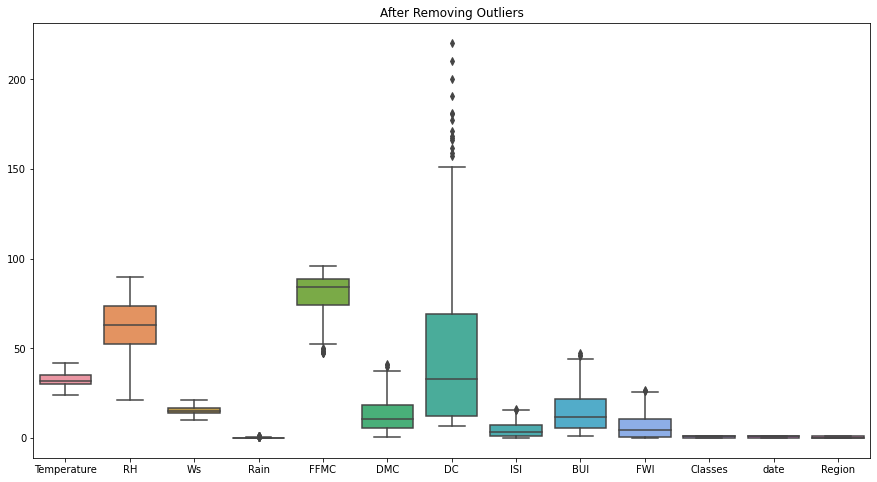

In [34]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.title("After Removing Outliers")

**Outliers Handling For DC feature**

Text(0.5, 1.0, 'Before Removing Outliers')

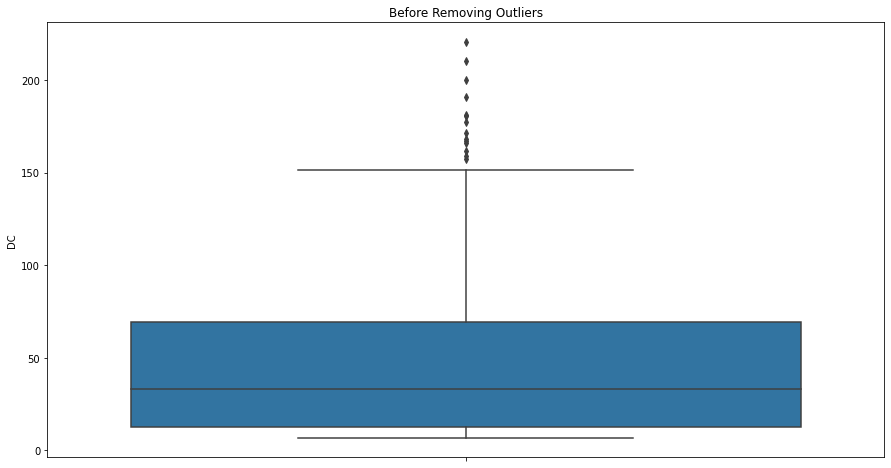

In [35]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, y= 'DC')
plt.title("Before Removing Outliers")

In [36]:
outliers = df[df['DC'] >=118]['DC']
df['DC'] = df[df['DC'] < 118]['DC']

Text(0.5, 1.0, 'After Removing Outliers')

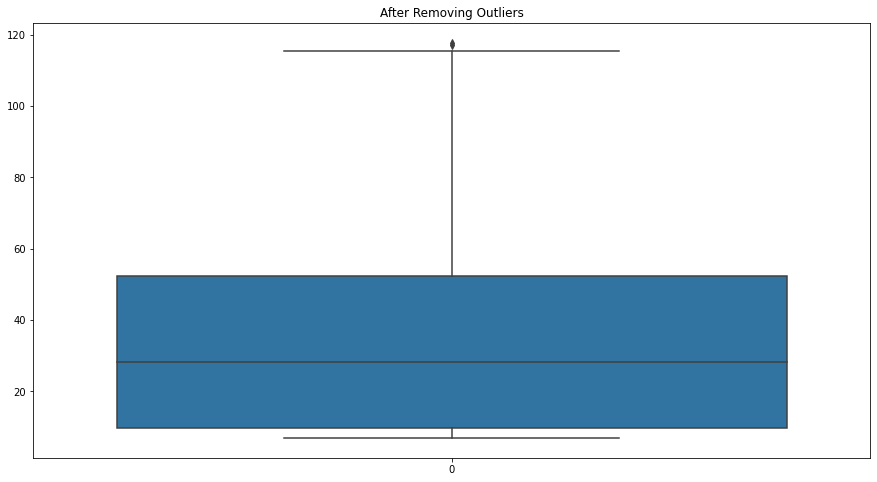

In [37]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df['DC'])
plt.title("After Removing Outliers")

**Check null value in eaxh column**

In [38]:
df.isnull().sum()

Temperature     2
RH              0
Ws              8
Rain           35
FFMC           13
DMC            12
DC             25
ISI             4
BUI            11
FWI             4
Classes         0
date            0
Region          0
dtype: int64

**Imputation of null value with the mean**

In [39]:
df.fillna(df.median().round(1), inplace=True)

**Check null value of each column**

In [40]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
date           0
Region         0
dtype: int64

# **Statistical Analysis**

**Correlation of numerical variable**

In [41]:
data = round(df.corr(),2)

**Heatmap to check correlation between different variable**

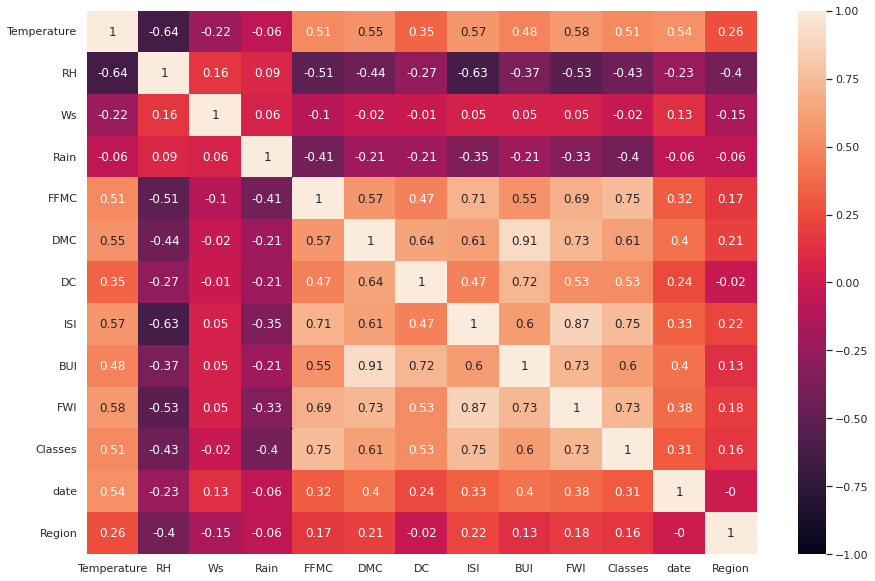

In [42]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=data, annot=True,  vmin=-1, vmax=1)

**Observations**
1. BUI and DMC are highly positvely correlated, so we will delete one feature i.e., BUI

In [43]:
df.drop('BUI', axis=1, inplace=True)

# **Model Building**

**Independent variable vs target variable distribution**

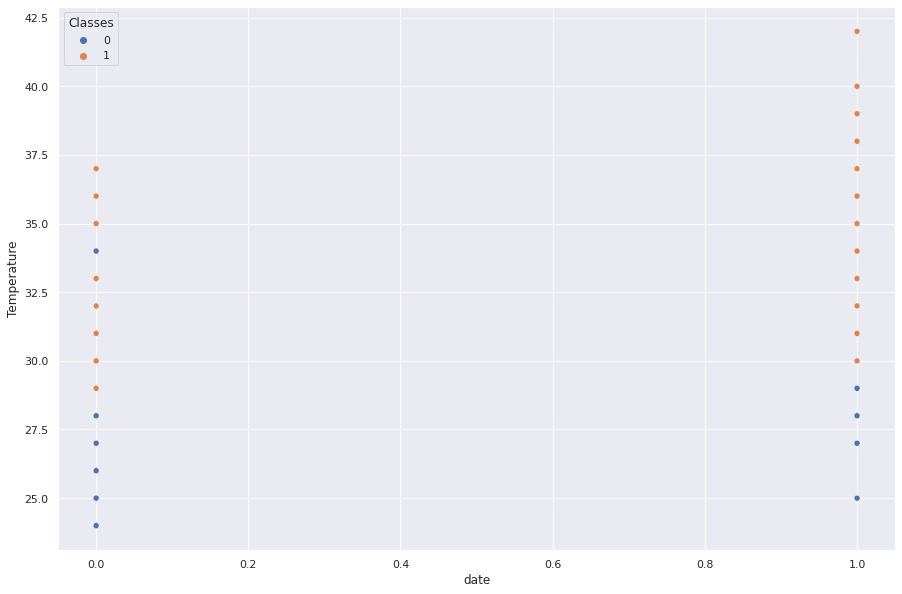

In [44]:
sns.scatterplot(data=df, x='date', y='Temperature', hue='Classes' )

In [45]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'FWI',
       'Classes', 'date', 'Region'],
      dtype='object')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    float64
 1   RH           243 non-null    float64
 2   Ws           243 non-null    float64
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   FWI          243 non-null    float64
 9   Classes      243 non-null    int64  
 10  date         243 non-null    int64  
 11  Region       243 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 22.9 KB


**Regression PLot**

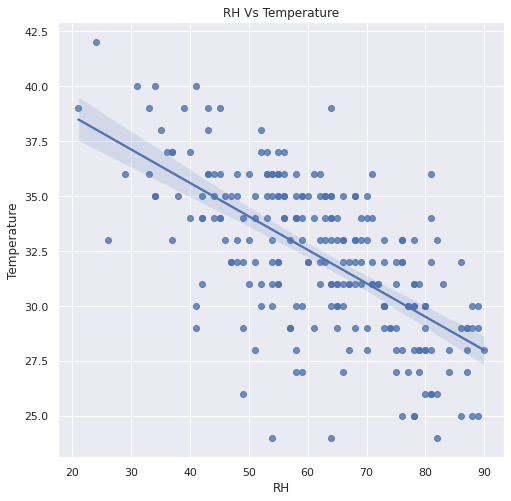

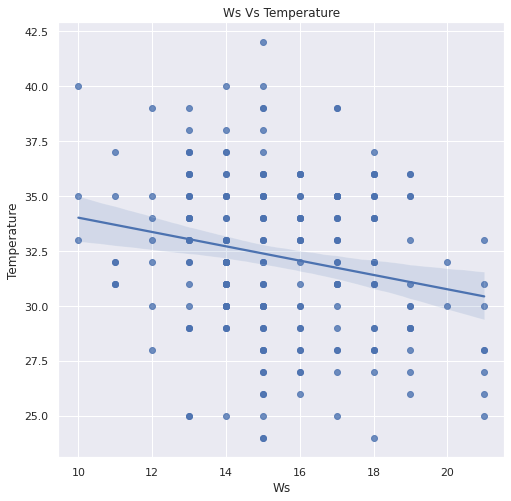

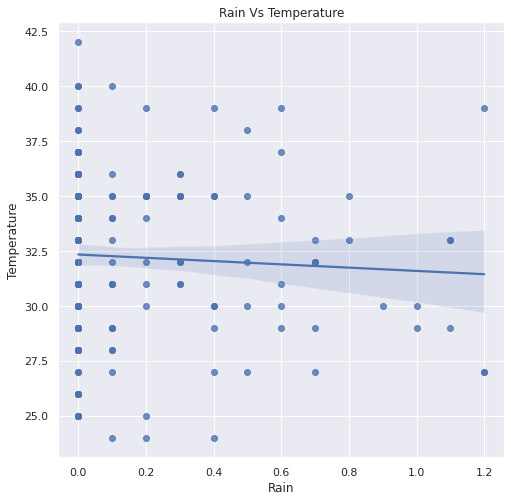

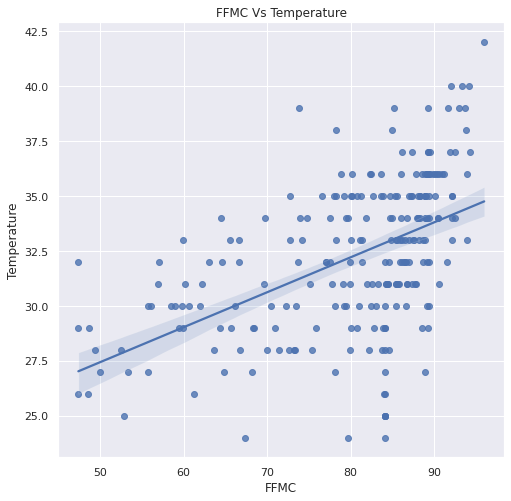

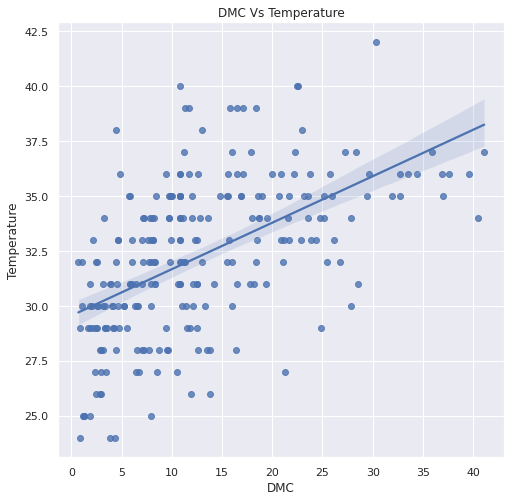

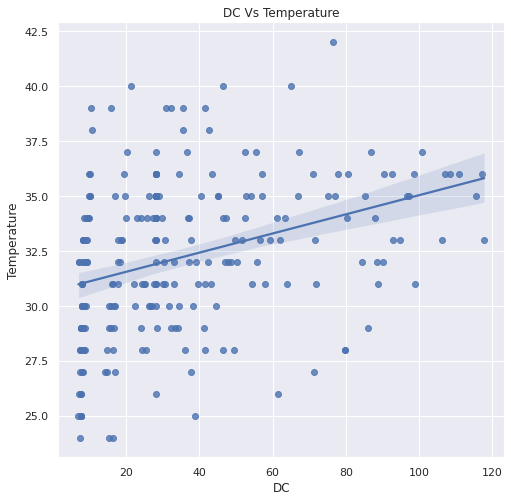

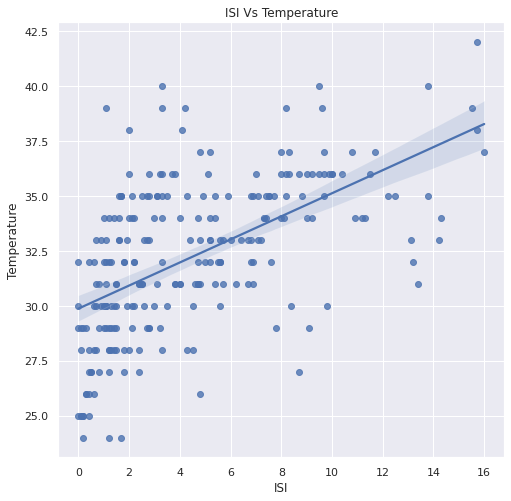

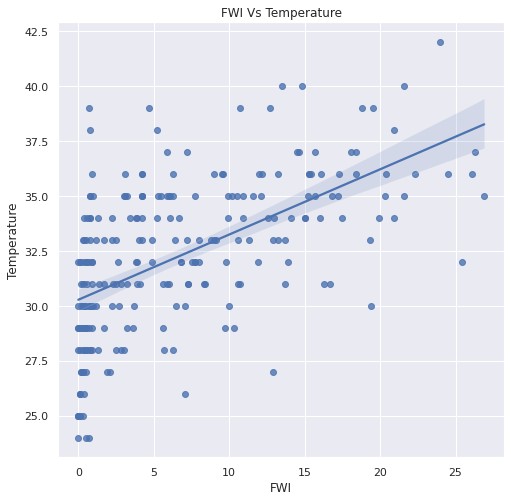

In [47]:
#### shaded region is basically with respect to ridge and lasso (lambda)
for feature in [feature for feature in df.columns if feature not in ['Temperature', 'date', 'Region', 'Classes']]:
    sns.set(rc={'figure.figsize':(8,8)})
    sns.regplot(x=df[feature], y=df['Temperature'])
    plt.xlabel(feature)
    plt.ylabel("Temperature")
    plt.title("{} Vs Temperature".format(feature))
    plt.show();

**Segregate dependent and independent feature**

In [48]:
### X independent features and y dependent feature
X= df[['RH', 'Ws', 'Rain','FFMC', 'DMC', 'ISI','DC',
       'FWI', 'Classes', 'Region', 'date']]
y=df[['Temperature']]

In [49]:
X

,RH,Ws,Rain,FFMC,DMC,ISI,DC,FWI,Classes,Region,date
0,57.0,18.0,0.0,65.7,3.4,1.3,7.6,0.5,0,0.0,0
1,61.0,13.0,0.0,64.4,4.1,1.0,7.6,0.4,0,0.0,0
2,82.0,15.0,0.0,84.1,2.5,0.3,7.1,0.1,0,0.0,0
3,89.0,13.0,0.0,84.1,1.3,0.0,6.9,0.0,0,0.0,0
4,77.0,16.0,0.0,64.8,3.0,1.2,14.2,0.5,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,65.0,14.0,0.0,85.4,16.0,4.5,44.5,6.5,1,1.0,0
239,87.0,15.0,0.0,84.1,6.5,0.1,8.0,0.0,0,1.0,0
240,87.0,15.0,0.5,84.1,3.5,0.4,7.9,0.2,0,1.0,0
241,54.0,18.0,0.1,79.7,4.3,1.7,15.2,0.7,0,1.0,0


**splitting the data into training and test dataset**

In [50]:
### random state train test split will be same with all people using random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Scaling the feature**

In [51]:
### creating a StandardScalar object
scaler=StandardScaler()
scaler

StandardScaler()

In [52]:
### Using fit_transform to standardise Train data
X_train=scaler.fit_transform(X_train)

In [53]:
### here using only transform to avoid data leakage
### (training mean and training std will be used for standardisation of test when we use transform on test data)
X_test=scaler.transform(X_test)

# **Linear Regression Model**

In [54]:
## creating linear regression model
linear_reg=LinearRegression()
linear_reg

LinearRegression()

In [55]:
pd.DataFrame(X_train).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [56]:
### Passing training data(X and y) to the model
linear_reg.fit(X_train, y_train)

LinearRegression()

In [57]:
### Printing co-efficients and intercept of best fit hyperplane
print("1. Co-efficients of independent features is {}".format(linear_reg.coef_))
print("2. Intercept of best fit hyper plane is {}".format(linear_reg.intercept_))

1. Co-efficients of independent features is [[-1.54124901 -0.70322143  0.13806361 -0.56701813  0.39154581  0.22987985
  -0.08348215  0.21115453  0.67213177  0.04275862  1.29003041]]
2. Intercept of best fit hyper plane is [32.16049383]


**Prediction of test data**

In [58]:
linear_reg_pred=linear_reg.predict(X_test)

In [59]:
residual_linear_reg=y_test-linear_reg_pred
residual_linear_reg = pd.DataFrame(residual_linear_reg)

##**Validation of Linear Regression assumptions**

**1. Linear Relationship**

Text(0, 0.5, 'Predicted data')

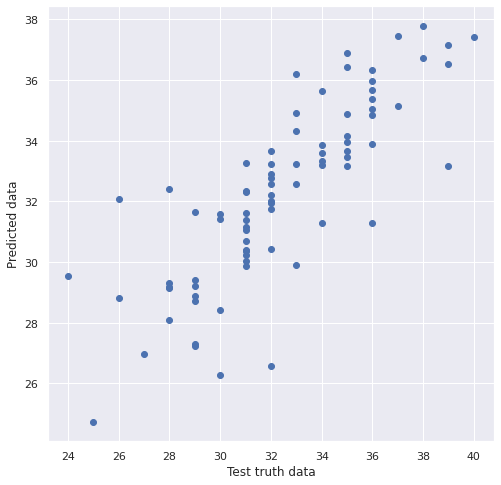

In [60]:
plt.scatter(x=y_test,y=linear_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

**2. Residual should be normally distributed**

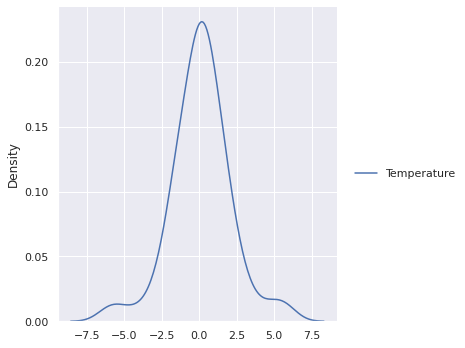

In [61]:
sns.displot(data=residual_linear_reg, kind='kde')

**3. Residual and Predicted values should follow uniform distribution**

Text(0, 0.5, 'Residuals')

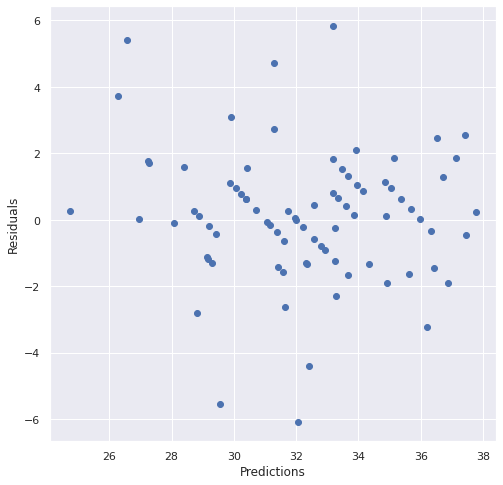

In [62]:
plt.scatter(x=linear_reg_pred, y=residual_linear_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

## **Cost Function Values**

In [63]:
print(f"MSE : {round(mean_squared_error(y_test, linear_reg_pred),2)}\nMAE : {round(mean_absolute_error(y_test, linear_reg_pred),2)}\nRMSE : {round(np.sqrt(mean_squared_error(y_test, linear_reg_pred)),2)}")

MSE : 3.97
MAE : 1.42
RMSE : 1.99


## **Performance Metrics**

In [64]:
linear_reg_r2_score=r2_score(y_test, linear_reg_pred)
linear_reg_adj_r2_score=1-((1-linear_reg_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(f"R-Squared Accuracy : {round(linear_reg_r2_score*100,3)} % \nAdjusted R-Squared Accuracy : {round(linear_reg_adj_r2_score*100,2)}%")

R-Squared Accuracy : 65.577 % 
Adjusted R-Squared Accuracy : 60.09%


# **Ridge Regresion Model**

In [65]:
## creating Ridge regression model
ridge_reg=Ridge()
ridge_reg

Ridge()

In [66]:
### Passing training data(X and y) to the model
ridge_reg.fit(X_train, y_train)

Ridge()

In [67]:
### Printing co-efficients and intercept of best fit hyperplane
print("1. Co-efficients of independent features is {}".format(ridge_reg.coef_))
print("2. Intercept of best fit hyper plane is {}".format(ridge_reg.intercept_))

1. Co-efficients of independent features is [[-1.5220595  -0.69660965  0.14190643 -0.54059873  0.39066657  0.23783093
  -0.08099752  0.21234668  0.65289177  0.04621455  1.27989004]]
2. Intercept of best fit hyper plane is [32.16049383]


**Prediction of test data**

In [68]:
ridge_reg_pred=ridge_reg.predict(X_test)

In [69]:
residual_ridge_reg=y_test-ridge_reg_pred
residual_ridge_reg = pd.DataFrame(residual_ridge_reg)

##**Validation of Ridge Regression assumptions**

**1. Linear Relationship**

Text(0, 0.5, 'Predicted data')

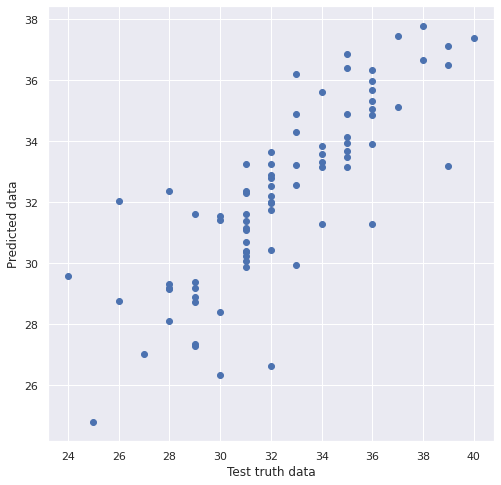

In [70]:
plt.scatter(x=y_test,y=ridge_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

**2. Residual should be normally distributed**

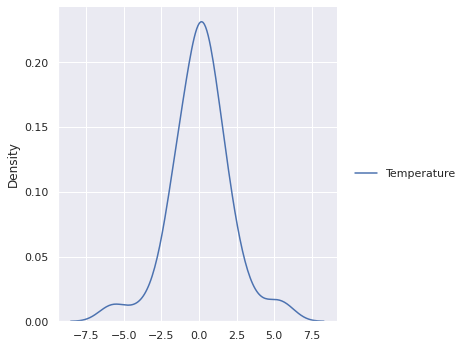

In [71]:
sns.displot(data = residual_ridge_reg, kind='kde')

**3. Residual and Predicted values should follow uniform distribution**

Text(0, 0.5, 'Residuals')

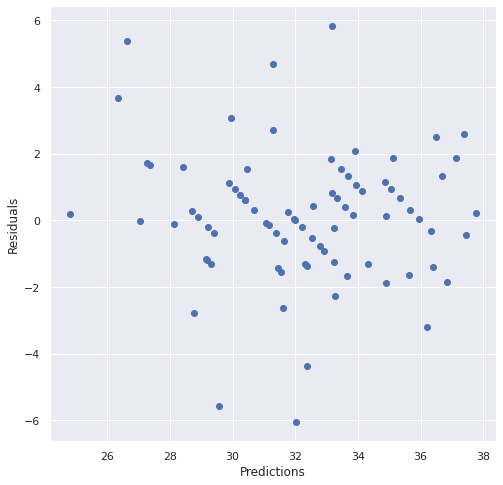

In [72]:
plt.scatter(x=ridge_reg_pred, y=residual_ridge_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

## **Cost Function Values**

In [73]:
print(f"MSE : {round(mean_squared_error(y_test, ridge_reg_pred),2)}\nMAE : {round(mean_absolute_error(y_test, ridge_reg_pred),2)}\nRMSE : {round(np.sqrt(mean_squared_error(y_test, ridge_reg_pred)),2)}")

MSE : 3.93
MAE : 1.41
RMSE : 1.98


# **Performance Metrics**

In [74]:
ridge_reg_r2_score=r2_score(y_test, ridge_reg_pred)
ridge_reg_adj_r2_score=1-((1-ridge_reg_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(f"R-Squared Accuracy : {round(ridge_reg_r2_score*100,3)} % \nAdjusted R-Squared Accuracy : {round(ridge_reg_adj_r2_score*100,2)}%")

R-Squared Accuracy : 65.852 % 
Adjusted R-Squared Accuracy : 60.41%


# **Lasso Regression Model**

In [75]:
## creating Lasso regression model
lasso_reg=Lasso()
lasso_reg

Lasso()

In [76]:
### Passing training data(X and y) to the model
lasso_reg.fit(X_train, y_train)

Lasso()

In [77]:
### Printing co-efficients and intercept of best fit hyperplane
print("1. Co-efficients of independent features is {}".format(lasso_reg.coef_))
print("2. Intercept of best fit hyper plane is {}".format(lasso_reg.intercept_))

1. Co-efficients of independent features is [-1.08734742 -0.         -0.          0.          0.07431697  0.
  0.          0.14897177  0.          0.          0.53109976]
2. Intercept of best fit hyper plane is [32.16049383]


**Prediction of test data**

In [78]:
lasso_reg_pred=lasso_reg.predict(X_test)

In [79]:
y_test = y_test.squeeze()
residual_lasso_reg = y_test-lasso_reg_pred
residual_lasso_reg = pd.DataFrame(residual_lasso_reg)

##**Validation of Lasso Regression assumptions**

**1. Linear Relationship**

Text(0, 0.5, 'Predicted data')

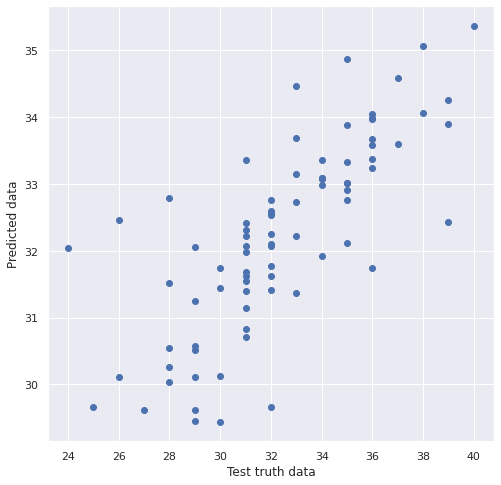

In [80]:
plt.scatter(x=y_test,y=lasso_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

**2. Residual should be normally distributed**

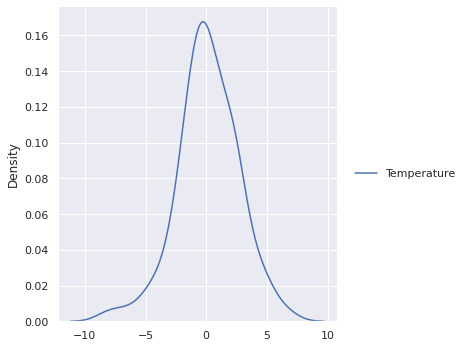

In [81]:
sns.displot( data = residual_lasso_reg, kind='kde')

**3. Residual and Predicted values should follow uniform distribution**

Text(0, 0.5, 'Residuals')

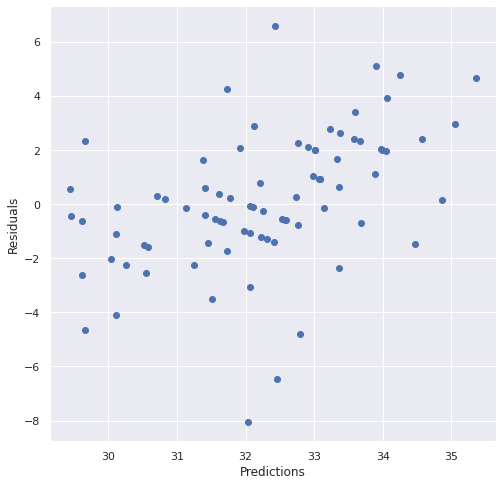

In [82]:
plt.scatter(x=lasso_reg_pred, y=residual_lasso_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

## **Cost Function Values**

In [83]:
print(f"MSE : {round(mean_squared_error(y_test, lasso_reg_pred),2)}\nMAE : {round(mean_absolute_error(y_test, lasso_reg_pred),2)}\nRMSE : {round(np.sqrt(mean_squared_error(y_test, lasso_reg_pred)),2)}")

MSE : 6.25
MAE : 1.89
RMSE : 2.5


## **Performance Metrics**

In [84]:
lasso_reg_r2_score=r2_score(y_test, lasso_reg_pred)
lasso_reg_adj_r2_score=1-((1-lasso_reg_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(f"R-Squared Accuracy : {round(lasso_reg_r2_score*100,3)} % \nAdjusted R-Squared Accuracy : {round(lasso_reg_adj_r2_score*100,2)}%")

R-Squared Accuracy : 45.787 % 
Adjusted R-Squared Accuracy : 37.14%


# **Elastic Net Regression Model**

In [85]:
## creating Elastic-Net regression model
elastic_reg=ElasticNet()
elastic_reg

ElasticNet()

In [86]:
### Passing training data(X and y) to the model
elastic_reg.fit(X_train, y_train)

ElasticNet()

In [87]:
### Printing co-efficients and intercept of best fit hyperplane
print("1. Co-efficients of independent features is {}".format(elastic_reg.coef_))
print("2. Intercept of best fit hyper plane is {}".format(elastic_reg.intercept_))

1. Co-efficients of independent features is [-0.80490282 -0.0858647   0.          0.0089834   0.24763801  0.25455999
  0.          0.21308972  0.16777268  0.          0.58280977]
2. Intercept of best fit hyper plane is [32.16049383]


**Prediction of test data**

In [88]:
elastic_reg_pred=elastic_reg.predict(X_test)

In [89]:
residual_elastic_reg=y_test-elastic_reg_pred
residual_elastic_reg = pd.DataFrame(residual_elastic_reg)

##**Validation of Elastic Regression assumptions**

**1. Linear Relationship**

Text(0, 0.5, 'Predicted data')

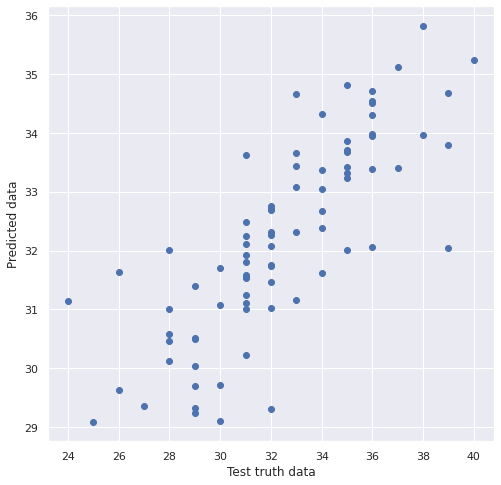

In [90]:
plt.scatter(x=y_test,y=elastic_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

**2. Residual should be normally distributed**

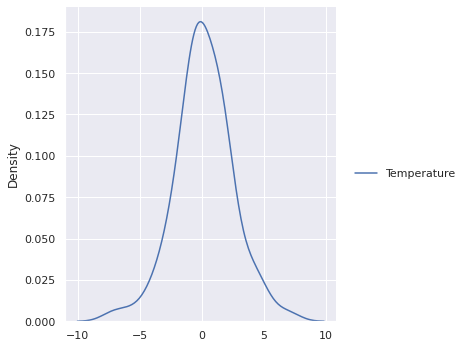

In [91]:
sns.displot( data = residual_elastic_reg, kind='kde')

**3. Residual and Predicted values should follow uniform distribution**

Text(0, 0.5, 'Residuals')

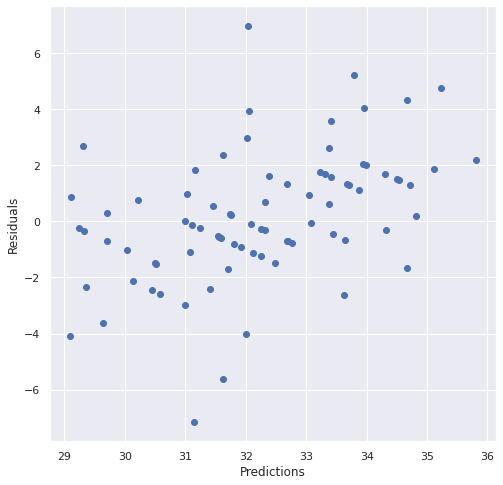

In [92]:
plt.scatter(x=elastic_reg_pred, y=residual_elastic_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

## **Cost Function Values**

In [93]:
print(f"MSE : {round(mean_squared_error(y_test, elastic_reg_pred),2)}\nMAE : {round(mean_absolute_error(y_test, elastic_reg_pred),2)}\nRMSE : {round(np.sqrt(mean_squared_error(y_test, elastic_reg_pred)),2)}")

MSE : 5.41
MAE : 1.75
RMSE : 2.33


## **Performance Metrics**

In [94]:
elastic_reg_r2_score=r2_score(y_test, elastic_reg_pred)
elastic_reg_adj_r2_score=1-((1-elastic_reg_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(f"R-Squared Accuracy : {round(elastic_reg_r2_score*100,3)} % \nAdjusted R-Squared Accuracy : {round(elastic_reg_adj_r2_score*100,2)}%")

R-Squared Accuracy : 53.05 % 
Adjusted R-Squared Accuracy : 45.56%


# **Comparisions of all Models**

## **Cost Function Values**

In [95]:
print(f"--------------------------------------")
print(f"MSE:\n1. Linear Regression : {round(mean_squared_error(y_test, linear_reg_pred),2)}\n2. Ridge Regression : {round(mean_squared_error(y_test, ridge_reg_pred),2)}\n3. Lasso Regression : {round(mean_squared_error(y_test, lasso_reg_pred),2)}\n4. Elastic Net Regression : {round(mean_squared_error(y_test, elastic_reg_pred),2)}")
print(f"---------------------------------------")
print(f"MAE:\n1. Linear Regression : {round(mean_absolute_error(y_test, linear_reg_pred),2)}\n2. Ridge Regression : {round(mean_absolute_error(y_test, ridge_reg_pred),2)}\n3. Lasso Regression : {round(mean_absolute_error(y_test, lasso_reg_pred),2)}\n4. Elastic Net Regression : {round(mean_absolute_error(y_test, elastic_reg_pred),2)}")
print(f"--------------------------------------")
print(f"RMSE:\n1. Linear Regression : {round(np.sqrt(mean_squared_error(y_test, linear_reg_pred)),2)}\n2. Ridge Regression : {round(np.sqrt(mean_squared_error(y_test, ridge_reg_pred)),2)}\n3. Lasso Regression : {round(np.sqrt(mean_squared_error(y_test, lasso_reg_pred)),2)}\n4. Elastic Net Regression : {round(np.sqrt(mean_squared_error(y_test, elastic_reg_pred)),2)}")
print(f"--------------------------------------")

--------------------------------------
MSE:
1. Linear Regression : 3.97
2. Ridge Regression : 3.93
3. Lasso Regression : 6.25
4. Elastic Net Regression : 5.41
---------------------------------------
MAE:
1. Linear Regression : 1.42
2. Ridge Regression : 1.41
3. Lasso Regression : 1.89
4. Elastic Net Regression : 1.75
--------------------------------------
RMSE:
1. Linear Regression : 1.99
2. Ridge Regression : 1.98
3. Lasso Regression : 2.5
4. Elastic Net Regression : 2.33
--------------------------------------


## **Performance Metrics**

In [96]:
print(f"--------------------------------------")
print(f"R-Squared Accuracy:\n1. Linear Regression : {round(linear_reg_r2_score*100,3)} %\n2. Ridge Regression : {round(ridge_reg_r2_score*100,3)} %\n3. Lasso Regression : {round(lasso_reg_r2_score*100,3)} %\n4. Elastic Net Regression : {round(elastic_reg_r2_score*100,3)} %")
print(f"--------------------------------------")
print(f"Adjusted R-Squared Accuracy:\n1. Linear Regression : {round(linear_reg_adj_r2_score*100,3)} %\n2. Ridge Regression : {round(ridge_reg_adj_r2_score*100,3)} %\n3. Lasso Regression : {round(lasso_reg_adj_r2_score*100,3)} %\n4. Elastic Net Regression : {round(elastic_reg_adj_r2_score*100,3)} %")
print(f"--------------------------------------")

--------------------------------------
R-Squared Accuracy:
1. Linear Regression : 65.577 %
2. Ridge Regression : 65.852 %
3. Lasso Regression : 45.787 %
4. Elastic Net Regression : 53.05 %
--------------------------------------
Adjusted R-Squared Accuracy:
1. Linear Regression : 60.089 %
2. Ridge Regression : 60.408 %
3. Lasso Regression : 37.145 %
4. Elastic Net Regression : 45.565 %
--------------------------------------


# **Conslusion**
* If you use the date feature without categorizing then our accuracy will be around 50 % and after the inclusion of categorization it has increased to 66 %, though it is not so good. 
* We can remove skewness from the data and also can use some method to handle imbalanced data in Rain feature. This is just a basic model. I will add all the possible techniques to improve accuracy in next session.